# Simulating a football season using Poisson Distribution

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import random

In [2]:
table = pd.read_csv('input_data.csv')

Text(0.5, 1.0, 'Historgram of the total number of goals scored in 2019-20 season')

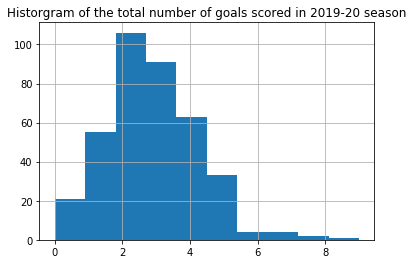

In [33]:
table['TotalGoals'].hist()
plt.title('Historgram of the total number of goals scored in 2019-20 season')

In [34]:
me = table['TotalGoals'].mean()
me

2.721052631578947

In [37]:
poisson = []
x = []
for i in range(0,10):
    x.append(i)
    poisson.append((math.e**(-me) * me**i)/math.factorial(i))

Text(0.5, 1.0, 'Histogram of a Poisson distribution with mean = mean(goals in 2019-20 season)')

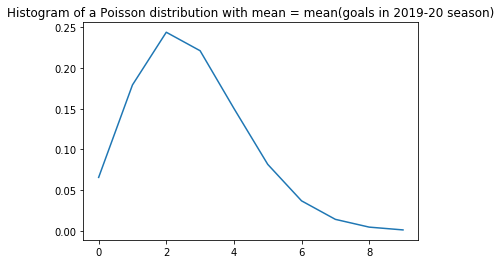

In [38]:
plt.plot(x,poisson)
plt.title('Histogram of a Poisson distribution with mean = mean(goals in 2019-20 season)')

(-1, 9)

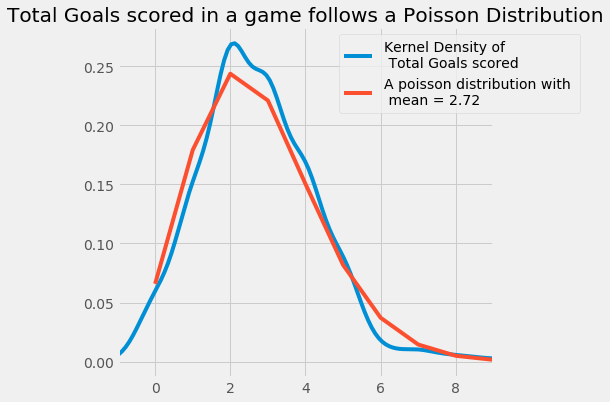

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
sns.kdeplot(table['TotalGoals'], label = 'Kernel Density of \n Total Goals scored')
plt.plot(x,poisson,label = 'A poisson distribution with \n mean = 2.72')
plt.legend(bbox_to_anchor=(1.25,1))
plt.title('Total Goals scored in a game follows a Poisson Distribution')
plt.xlim(-1, 9)

In [7]:
#Simulating a season

In [8]:
#Formula to simulate a match
#Step 1: Calculate average home goals scored in the season.
#Step 2: Calculate average away goals scored in the season.
#Step 3: For every team who played at home:
#            Calculate home attacking strength = Averge goals scored at home by team / Average goals scored at home overall. (From step 1)
#Step 4: For every team who played away:
#            Calculate away defensive strength = Averge goals conceded away by team / Average goals scored at home overall. (From step 1)
#Step 5: For every team who played at home:
#            Calculate home defensive strength = Averge goals conceded at home by team / Average goals scored away overall. (From step 2)
#Step 6: For every team who played away:
#            Calculate away attacking strength = Averge goals scored away by team / Average goals scored away overall. (From step 2)
#Step 7: Expected home goals scored in a game:
#            Home team attack strength * away team defence strength * average number of home goals
#Step 8: Expected away goals scored in a game:
#            Home team defense strength * away team attack strength * average number of away goals
#Step 9: Instead of using the expected values from Step 7 and Step 8: sample them from a Poisson distribution with lambda parameter = parameters from Step 7 and Step 8.
#        Remember for a Poisson distribution: lambda is the expected value(or mean)
#Step 10: Run these scenarios for several iterations to get simulated results over vast period of time.


In [9]:
#Average goals scored at home = total home goals scored in the season / total number of home games
average_home_hoals = table['FTHG'].mean().round(3)

In [10]:
#Average goals scored away = total away goals scored in the season / total number of away games
average_away_hoals = table['FTAG'].mean().round(3)

In [11]:
#Expected home goals scored in a game:
    #Home team attack strength * away team defence strength * average number of home goals

#home team attacking strength

home_attacking_strength = {}

for team in table['HomeTeam'].unique():
    home_attacking_strength[team] = ((table.loc[table['HomeTeam'] == team]['FTHG'].mean())/average_home_hoals).round(3)
    
    #away team defensive strength
away_defensive_strength = {}
for team in table['AwayTeam'].unique():
    away_defensive_strength[team] = ((table.loc[table['AwayTeam'] == team]['FTHG'].mean())/average_home_hoals).round(3)

In [12]:
#Expected away goals scored in a game:
    #Home team defense strength * away team attack strength * average number of away goals

#home team attacking strength

home_defensive_strength = {}

for team in table['HomeTeam'].unique():
    home_defensive_strength[team] = ((table.loc[table['HomeTeam'] == team]['FTAG'].mean())/average_away_hoals).round(3)
    
    #away team defensive strength
away_attacking_strength = {}
for team in table['AwayTeam'].unique():
    away_attacking_strength[team] = ((table.loc[table['AwayTeam'] == team]['FTAG'].mean())/average_away_hoals).round(3)

In [13]:
home_attacking_strength

{'Liverpool': 1.805,
 'West Ham': 1.042,
 'Bournemouth': 0.764,
 'Burnley': 0.833,
 'Crystal Palace': 0.521,
 'Watford': 0.764,
 'Tottenham': 1.25,
 'Leicester': 1.215,
 'Newcastle': 0.694,
 'Man United': 1.389,
 'Arsenal': 1.25,
 'Aston Villa': 0.764,
 'Brighton': 0.694,
 'Everton': 0.833,
 'Norwich': 0.66,
 'Southampton': 0.729,
 'Man City': 1.979,
 'Sheffield United': 0.833,
 'Chelsea': 1.042,
 'Wolves': 0.937}

In [14]:
away_defensive_strength

{'Norwich': 1.319,
 'Man City': 0.764,
 'Sheffield United': 0.833,
 'Southampton': 0.868,
 'Everton': 1.215,
 'Brighton': 0.937,
 'Aston Villa': 1.285,
 'Wolves': 0.729,
 'Arsenal': 0.833,
 'Chelsea': 1.319,
 'Burnley': 0.937,
 'Bournemouth': 1.215,
 'West Ham': 1.007,
 'Watford': 1.285,
 'Newcastle': 1.285,
 'Liverpool': 0.59,
 'Tottenham': 1.042,
 'Crystal Palace': 1.042,
 'Leicester': 0.833,
 'Man United': 0.66}

In [15]:
home_defensive_strength

{'Liverpool': 0.699,
 'West Ham': 1.441,
 'Bournemouth': 1.31,
 'Burnley': 1.005,
 'Crystal Palace': 0.874,
 'Watford': 1.179,
 'Tottenham': 0.743,
 'Leicester': 0.743,
 'Newcastle': 0.917,
 'Man United': 0.743,
 'Arsenal': 1.048,
 'Aston Villa': 1.31,
 'Brighton': 1.179,
 'Everton': 0.917,
 'Norwich': 1.616,
 'Southampton': 1.529,
 'Man City': 0.568,
 'Sheffield United': 0.655,
 'Chelsea': 0.699,
 'Wolves': 0.83}

In [16]:
away_attacking_strength

{'Norwich': 0.306,
 'Man City': 1.965,
 'Sheffield United': 0.655,
 'Southampton': 1.31,
 'Everton': 0.874,
 'Brighton': 0.83,
 'Aston Villa': 0.83,
 'Wolves': 1.048,
 'Arsenal': 0.874,
 'Chelsea': 1.703,
 'Burnley': 0.83,
 'Bournemouth': 0.786,
 'West Ham': 0.83,
 'Watford': 0.611,
 'Newcastle': 0.786,
 'Liverpool': 1.441,
 'Tottenham': 1.092,
 'Crystal Palace': 0.699,
 'Leicester': 1.398,
 'Man United': 1.136}

In [17]:
all_teams = ['Norwich',
 'Man City',
 'Sheffield United',
 'Southampton',
 'Everton',
 'Brighton',
 'Aston Villa',
 'Wolves',
 'Arsenal',
 'Chelsea',
 'Burnley',
 'Bournemouth',
 'West Ham',
 'Watford',
 'Newcastle',
 'Liverpool',
 'Tottenham',
 'Crystal Palace',
 'Leicester',
 'Man United']

# Simulating a single season

In [58]:
all_season_tables = []
all_matches = []

wins = {}
draws = {}
losses = {}
points = {}
GF = {}
GA = {}
final_points_table = None
for team in all_teams:
    wins[team] = 0
    draws[team] = 0
    losses[team] = 0
    points[team] = 0
    GF[team] = 0
    GA[team] = 0
for i in range(0,len(all_teams)):
    for j in range(0,len(all_teams)):
        if i!=j:
            ht = all_teams[i]
            at = all_teams[j]
            #Calculating home team goals:
            #Home team attack strength * away team defence strength * average number of home goals
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * average_home_hoals
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            #Calculating home team goals:
            #Home team defense strength * away team attack strength * average number of away goals
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * average_away_hoals
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':all_teams[i],
                     'Away_Team':all_teams[j],
                     'Home_Goals':ht_g,
                     'Away_Goals':at_g}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
final_points_table['GamesPlayed'] = 38
final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
final_points_table['Position'] = range(1,21)            

In [59]:
final_points_table

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position
0,Man City,38,29,3,6,90,106,34,72,1
1,Liverpool,38,24,9,5,81,76,31,45,2
2,Leicester,38,23,10,5,79,78,33,45,3
3,Chelsea,38,22,6,10,72,79,46,33,4
4,Man United,38,21,7,10,70,64,39,25,5
5,Tottenham,38,22,3,13,69,68,61,7,6
6,Wolves,38,20,6,12,66,60,51,9,7
7,Southampton,38,15,8,15,53,48,57,-9,8
8,West Ham,38,14,9,15,51,50,56,-6,9
9,Brighton,38,13,10,15,49,38,50,-12,10


In [68]:
single_season_all_results = pd.DataFrame(all_matches)
single_season_all_results['Total_Goals'] = single_season_all_results['Home_Goals'] + single_season_all_results['Away_Goals']

In [69]:
poisson_single = []
x_single = []
for i in range(0,10):
    x_single.append(i)
    poisson_single.append((math.e**(-single_season_all_results['Total_Goals'].mean()) * single_season_all_results['Total_Goals'].mean()**i)/math.factorial(i))

(-1, 9)

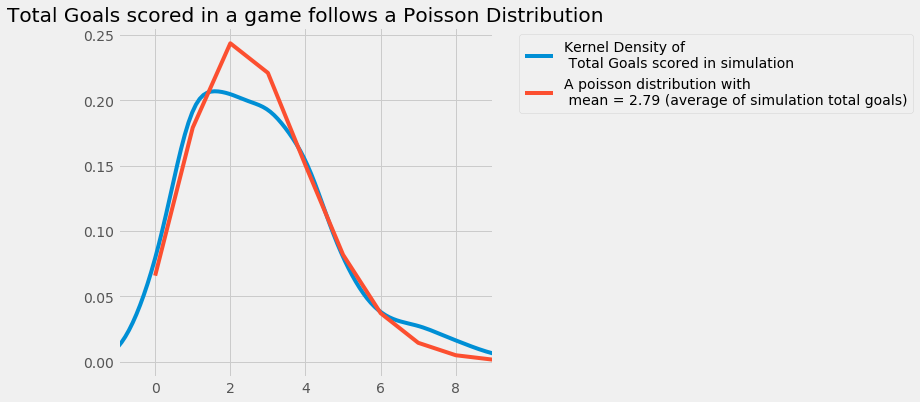

In [71]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
sns.kdeplot(single_season_all_results['Total_Goals'], label = 'Kernel Density of \n Total Goals scored in simulation')
plt.plot(x,poisson,label = 'A poisson distribution with \n mean = 2.79 (average of simulation total goals)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('Total Goals scored in a game follows a Poisson Distribution')
plt.xlim(-1, 9)

# Simulating a 100 seasons

In [74]:
all_season_tables = []
all_matches = []
introduce_randomness = True
for season in range(1,101):
    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None
    for team in all_teams:
        wins[team] = 0
        draws[team] = 0
        losses[team] = 0
        points[team] = 0
        GF[team] = 0
        GA[team] = 0
    for i in range(0,len(all_teams)):
        for j in range(0,len(all_teams)):
            if i!=j:
                ht = all_teams[i]
                at = all_teams[j]

                #Calculating home team goals:
                #Home team attack strength * away team defence strength * average number of home goals
                effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * average_home_hoals
                effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
                ht_g = np.random.poisson(effective_home_lambda)
                ht_g = round(ht_g)

                #Calculating home team goals:
                #Home team defense strength * away team attack strength * average number of away goals
                effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * average_away_hoals
                effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
                at_g = np.random.poisson(effective_away_lambda)
                at_g = round(at_g)


                match = {'Home_Team':all_teams[i],
                         'Away_Team':all_teams[j],
                        'Home_Goals':ht_g,
                        'Away_Goals':at_g,
                        'Season':season}
                all_matches.append(match)

                GF[ht] += ht_g
                GF[at] += at_g
                GA[ht] += at_g
                GA[at] += ht_g

                #Assigning Points:
                if ht_g > at_g:
                    wins[ht] +=1
                    losses[at] +=1
                    points[ht] +=3
                elif ht_g < at_g:
                    wins[at] +=1
                    losses[ht] +=1
                    points[at] +=3
                if ht_g == at_g:
                    draws[ht] +=1
                    draws[at] +=1
                    points[ht] +=1
                    points[at] +=1
            else:
                continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 38
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team',
                                             'GamesPlayed', 
                                             'Wins', 
                                             'Draws', 
                                             'Losses', 
                                             'Points', 
                                             'GF', 
                                             'GA',
                                             'GD']].sort_values(['Points','GD', 'GF', 'GA'], 
                                                                ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,21)
    final_points_table['Season'] = season
    
    all_season_tables.append(final_points_table)
            

In [75]:
all_season_tables = pd.concat(all_season_tables)
all_season_tables.groupby(['Position','Team'])['Team'].agg({'Season':'count'}).reset_index().sort_values(['Position','Season'], ascending = [True,False]).rename(columns = {'Season':'TimesFinished'}).reset_index(drop = True)

C:\Users\sabar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Position,Team,TimesFinished
0,1,Man City,64
1,1,Liverpool,29
2,1,Man United,3
3,1,Chelsea,1
4,1,Leicester,1
5,1,Tottenham,1
6,1,Wolves,1
7,2,Liverpool,45
8,2,Man City,28
9,2,Man United,12


In [76]:
all_matches_table = pd.DataFrame(all_matches)
all_matches_table = all_matches_table[['Season','Home_Team','Away_Team','Home_Goals','Away_Goals']]
all_matches_table['Total_Goals'] = all_matches_table['Home_Goals'] + all_matches_table['Away_Goals']
all_matches_table.sort_values('Total_Goals', ascending  = False).head(20)

,Season,Home_Team,Away_Team,Home_Goals,Away_Goals,Total_Goals
1924,6,Man City,Aston Villa,13,2,15
30054,80,Man City,Tottenham,10,5,15
26762,71,Arsenal,Bournemouth,10,4,14
32974,87,Liverpool,Chelsea,8,6,14
21820,58,Arsenal,Chelsea,7,7,14
27979,74,West Ham,Bournemouth,6,7,13
20325,54,Chelsea,Liverpool,5,8,13
26768,71,Arsenal,Crystal Palace,10,3,13
779,3,Man City,Norwich,13,0,13
33289,88,West Ham,Man City,3,10,13


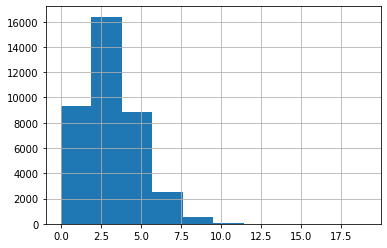

In [26]:
all_matches_table['Total_Goals'].hist()